In [206]:
import pandas as pd
import numpy as np

In [207]:
df2 = pd.read_csv("/Users/blabbyduck/Desktop/NUS-SDS-Datathon-Champion/data/catA_train.csv")

In [208]:
print(df2.shape)
print(df2.columns)
print(df2.info())

(29182, 28)
Index(['LATITUDE', 'LONGITUDE', 'AccountID', 'Company', 'SIC Code', 'Industry',
       '8-Digit SIC Code', '8-Digit SIC Description', 'Year Found',
       'Entity Type', 'Parent Company', 'Parent Country', 'Ownership Type',
       'Company Description', 'Square Footage',
       'Company Status (Active/Inactive)', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Import/Export Status',
       'Fiscal Year End', 'Global Ultimate Company', 'Global Ultimate Country',
       'Domestic Ultimate Company', 'Is Domestic Ultimate',
       'Is Global Ultimate'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATI

In [209]:
df2.describe()

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
count,29062.000000,29062.000000,29182.000000,2.918200e+04,28748.000000,0.0,16779.000000,29103.000000,2.640800e+04,2.918200e+04,2.918200e+04,29182.000000,29182.000000
mean,1.320677,103.843324,6169.271160,6.169092e+07,2004.505913,NaN,36.856189,139.764182,6.994665e+03,7.520992e+08,3.931771e+09,0.500069,0.257248
std,0.043740,0.053757,1705.845535,1.705778e+07,13.464238,NaN,173.334420,1118.939249,4.539462e+04,1.019636e+10,2.184589e+10,0.500009,0.437125
min,1.238792,103.611319,132.000000,1.320000e+06,1819.000000,NaN,1.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,0.000000,0.000000
25%,1.284665,103.831874,5084.000000,5.084000e+07,1997.000000,NaN,10.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,0.000000,0.000000
50%,1.309701,103.848989,6719.000000,6.719000e+07,2008.000000,NaN,16.000000,16.000000,1.500000e+01,2.606644e+06,3.259582e+06,1.000000,0.000000
75%,1.337889,103.865922,7311.000000,7.311000e+07,2014.000000,NaN,29.000000,60.000000,1.000000e+02,2.176969e+07,1.482258e+08,1.000000,1.000000
max,1.469800,104.003218,9721.000000,9.721990e+07,2023.000000,NaN,12000.000000,80000.000000,2.190000e+06,3.184764e+11,5.140000e+11,1.000000,1.000000


In [210]:
df2.isna().sum()

LATITUDE                                 120
LONGITUDE                                120
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               434
Entity Type                                0
Parent Company                           514
Parent Country                           520
Ownership Type                             0
Company Description                        0
Square Footage                         29182
Company Status (Active/Inactive)           0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Fiscal Yea

In [211]:
df2 = df2.dropna(subset=["LATITUDE", "LONGITUDE"]) #remove the null val, info loss, but simple & str forward
#if not, use imputation sklearn.impute.KNNImputer
#mean, median, most common val (mode) 
#good estimate for normally distributed data (mean), skewed data (median), we also preserve the infos
#bad if the wrong imputation is used

In [212]:
#N.O.I.R N - Nominal O - ordinal I interval R ratio
#nominal - qualitative data, no sense of direction, like ratings
#ordinal - ordered, ranking 
#one hot encoding, pd.get_dummies(), bad dude to curse of dimensionality
#Ordinal encoding, from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, maps string to number

In [213]:
#remove inactive company
df2 = df2[df2['Company Status (Active/Inactive)'] == 'Active']

In [214]:
# to ensure important info isnt being lost
# to ensure important info isnt being lost
df2['Import/Export Status_Missing'] = df2['Import/Export Status'].isna()

df3 = df2.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
                                       "Year Found"])

df3 = pd.get_dummies(df2, columns=['Entity Type'], prefix='Entity_Type')
df3 = pd.get_dummies(df2, columns=['Ownership Type'], prefix='Ownership_Type')
df3 = pd.get_dummies(df2, columns=['Import/Export Status'], prefix='Import_Export_Status')
df3 = df2.drop(columns=[col for col in ["Company Status (Active/Inactive)", "Entity Type", 'Import/Export Status', 'Ownership Type'] if col in df2.columns], errors='ignore') # are all Active

In [215]:
df3.isna().sum()

LATITUDE                                   0
LONGITUDE                                  0
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               430
Parent Company                           510
Parent Country                           516
Company Description                        0
Square Footage                         29062
Employees (Single Site)                12357
Employees (Domestic Ultimate Total)       78
Employees (Global Ultimate Total)       2766
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Fiscal Year End                        22356
Global Ultimate Company                  510
Global Ultimate Country                  519
Domestic Ultimate Company               1033
Is Domesti

In [216]:
sic_code_frequency = df3['SIC Code'].value_counts()

# Set a threshold for low-frequency SIC Codes
threshold = 7  # Adjust this threshold based on your preference, companies that fall under the threshold will be labelled as others

# Identify SIC Codes with frequency below the threshold
low_frequency_sic_codes = sic_code_frequency[sic_code_frequency < threshold].index

# Replace these low-frequency SIC Codes with a common label "Others"
df3['SIC Code'] = df3['SIC Code'].replace(low_frequency_sic_codes, 'Others')

sic_code_frequency1 = df3['SIC Code'].value_counts()

# Display the updated DataFrame
print(sic_code_frequency1)

SIC Code
6719.0    7743
8742.0    1387
Others     883
7371.0     774
4731.0     734
          ... 
781.0        7
2035.0       7
7313.0       7
3442.0       7
5441.0       7
Name: count, Length: 330, dtype: int64


In [217]:
#check the na value
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
Index: 29062 entries, 0 to 29181
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29062 non-null  object 
 3   Company                              29062 non-null  object 
 4   SIC Code                             29062 non-null  float64
 5   Industry                             29062 non-null  object 
 6   8-Digit SIC Code                     29062 non-null  float64
 7   8-Digit SIC Description              29062 non-null  object 
 8   Year Found                           28632 non-null  float64
 9   Entity Type                          29062 non-null  object 
 10  Parent Company                       28552 non-null  object 
 11  Parent Country                   

In [218]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 29062 entries, 0 to 29181
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29062 non-null  object 
 3   Company                              29062 non-null  object 
 4   SIC Code                             29062 non-null  object 
 5   Industry                             29062 non-null  object 
 6   8-Digit SIC Code                     29062 non-null  float64
 7   8-Digit SIC Description              29062 non-null  object 
 8   Year Found                           28632 non-null  float64
 9   Parent Company                       28552 non-null  object 
 10  Parent Country                       28546 non-null  object 
 11  Company Description              

In [219]:
# convert to str cus we dont want it to be trained as a numeric value
# Convert the entire column to a common data type (string in this case), assert that this column must be strings
df3['SIC Code'] = df3['SIC Code'].astype(str)

In [220]:
from sklearn.preprocessing import LabelEncoder

In [221]:
# Use label encoding for 'SIC Code'
label_encoder = LabelEncoder()
df3['SIC Code'] = label_encoder.fit_transform(df3['SIC Code'])

In [222]:
df3["SIC Code"].unique() #unique categories we have in this column. Avoid using one hot encoding and also reduced the effect of curse of dimenstionality
#SIC is like the sectors. Depending on what sector they are, will affect the sales
#trying to find the domestic sales output

array([262, 108, 241, 329, 167, 296,  21, 272,  37, 243, 276, 240, 206,
       281, 118, 256,  99, 321,   5, 312, 104, 153, 325, 183, 160, 320,
       324, 247, 238, 163,  22, 120, 207,  49, 264, 143, 254, 125, 148,
       328, 166,  95, 111, 129, 199, 178, 156, 293, 237, 103, 299, 155,
        53,  67, 261, 137, 233, 106, 101, 217, 267, 212, 115,  18, 251,
       190, 310, 244, 316, 164, 222, 110, 248, 184,  39,  66, 286, 232,
       135, 128, 134, 284,  87, 185,  51, 173, 322,  34, 126, 259, 146,
       133,  71, 327, 298, 188, 142, 141, 308,  36, 107,  81, 219, 140,
       187, 144, 227, 246, 266, 102, 195, 202,  89,   2,   8,   7, 275,
       242,  84, 234, 269,  12, 149, 145,  60, 182, 213,  85, 157, 291,
       214, 287, 304,  90, 220, 317, 205, 113,  27, 257, 292, 158, 209,
        74, 273,  83, 307,   3,  11, 245, 323, 258, 122, 186, 139,  42,
       314, 179, 301, 162, 236, 196, 100, 305, 174,  73,  44,  14, 201,
        16, 193, 197,  93,  94,  96, 224, 229, 132,  48,  40,   

Exploratory Data Analysis

In [223]:
#plotting data easy
#single variable df[col].plot(kind = 'hist')
#two variables df.plot(kind = 'scatter', x='col2',y='col3')
#subplots - having multiple plots

In [224]:
#matplotlib has more plotting features than pandas
#seaborn is similar to matplotlib, comparatively aesthetic, and allows for heatmaps seaborn.heatmap(df.corr())


FEATURE SELECTION/ FETAURE RANKING wrt domestic sales

Through df.corr() wrt the target value
decision_tree_model.feature_importances_ (sklearn)
sklearn.feature_selection.RFE

Note correlation != causation

also identify low variance variables which provide not useful informations. sklearn.preprocessing import VarianceThreshold


data manipulation to change date time
pd.datetime(df['cltdob_fix'])


In [225]:
# use of a correlation matrix to observe how variables in our dataset may be affected by others
numerical_df = df3.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numerical_df.corr()

# Assuming correlation_matrix is your correlation matrix
correlation_df = pd.DataFrame(correlation_matrix)

# Print or use the correlation DataFrame as needed
correlation_df

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
LATITUDE,1.000000,-0.048014,-0.090848,-0.086741,-0.023920,NaN,0.001218,0.004256,-0.010028,0.004602,-0.010685,-0.004247,-0.039308
LONGITUDE,-0.048014,1.000000,0.019071,0.027591,-0.008341,NaN,-0.006147,0.013906,0.003871,-0.006884,0.008687,0.001314,0.009406
SIC Code,-0.090848,0.019071,1.000000,0.855014,0.146938,NaN,-0.037077,-0.012975,-0.000513,-0.014151,-0.023470,0.011546,0.090281
8-Digit SIC Code,-0.086741,0.027591,0.855014,1.000000,0.195899,NaN,-0.051843,-0.022186,0.001599,-0.011617,-0.014653,0.016634,0.087467
Year Found,-0.023920,-0.008341,0.146938,0.195899,1.000000,NaN,-0.060604,-0.046587,-0.026246,0.014576,-0.022241,0.076406,0.112065
Square Footage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employees (Single Site),0.001218,-0.006147,-0.037077,-0.051843,-0.060604,NaN,1.000000,0.138964,0.008485,0.003552,0.001486,-0.016532,0.004826
Employees (Domestic Ultimate Total),0.004256,0.013906,-0.012975,-0.022186,-0.046587,NaN,0.138964,1.000000,0.020450,0.016899,0.024313,-0.060773,-0.044315
Employees (Global Ultimate Total),-0.010028,0.003871,-0.000513,0.001599,-0.026246,NaN,0.008485,0.020450,1.000000,-0.003975,0.664014,0.076335,-0.087309
Sales (Domestic Ultimate Total USD),0.004602,-0.006884,-0.014151,-0.011617,0.014576,NaN,0.003552,0.016899,-0.003975,1.000000,0.098417,-0.054627,-0.039397


Geospatial Analysis
This can be done either with Matplotlib (Plot latitude against longitude) or Folium (to visualize each pair of coordinates on a map of Singapore).

We will create a copy of our previously created dataframe and subset a small portion of it to perform the analysis on.

In [226]:
# import required libraries
import matplotlib.pyplot as plt

# we will need this for the color gradient representing how high the domestic sales figure is.
from matplotlib.colors import LogNorm
import seaborn as sns

In [227]:
# for the upcoming geospatial analysis portion, we will use a small subset of the data provided for plotting.
filtered_df = df2[df2['SIC Code'].isin([3731, 6719, 4225,7371,3841,5999,3827,6719,6719,7371,2519,5084,5039,7374,5944,7623 ,4724,4499,5099,1799,5812,6531,6531,6719,7371,5085,6531,1799,4789,5084,6719,4724,6719])]

filtered_df.head(2)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Import/Export Status_Missing
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,True
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,True


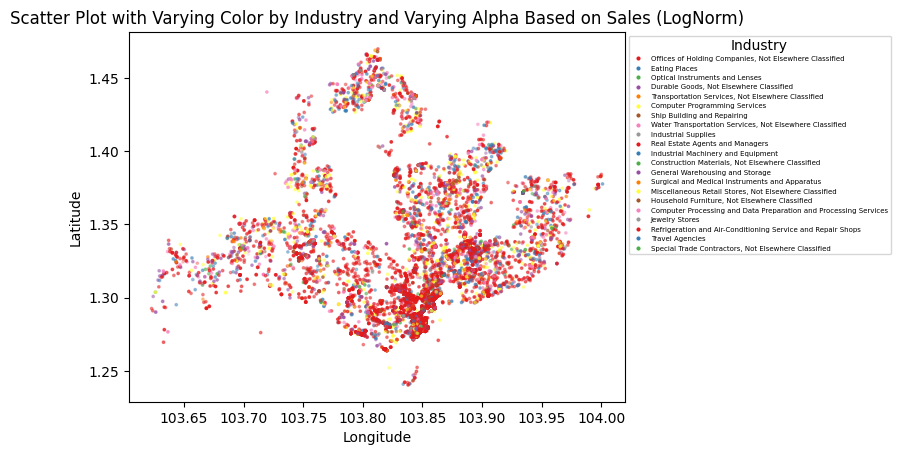

In [228]:
# read in the filtered dataset and do EDA. confusion matrix, etc
# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()

# Define a constant color (e.g., blue)
constant_color = 'blue'

# Define a color palette based on unique industries
industry_palette = sns.color_palette('Set1', n_colors=len(filtered_df['Industry'].unique()))

# Create a dictionary to map Industry to a unique color
industry_colors = dict(zip(filtered_df['Industry'].unique(), industry_palette))

# Scatter plot with varying color by Industry and varying alpha based on Sales values
scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Industry'].map(industry_colors), s=3, alpha=norm(filtered_df['Sales (Domestic Ultimate Total USD)']))

# Add a legend for Industry
legend_labels = filtered_df['Industry'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=industry,
                              markerfacecolor=industry_colors[industry], markersize=4) for industry in legend_labels]
plt.legend(handles=legend_handles, title='Industry', prop={'size': 5}, loc='upper left', bbox_to_anchor=(1, 1))

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Varying Color by Industry and Varying Alpha Based on Sales (LogNorm)')

# Show the plot
plt.show()

From the scatter plot above, companies located nearer to the download earns the most money. Hence, corr wrt lattitude and longtitude

In [229]:
#DO GRADIENT BOOSTING ***** 
#from sklearn.ensemble import GradientBoostingRegressor
#model = GradientBoostingRegressor(random_state = 42), sep dependent and indep variable, seperate into test and train set.

1) Plot sales wrt Year Found
2) if companies being domestic/global/ both ultimate affects sales

<Axes: xlabel='Year Found', ylabel='Sales (Domestic Ultimate Total USD)'>

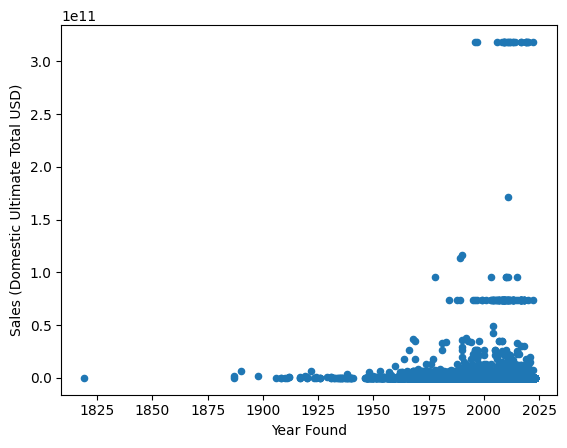

In [230]:
#line graph wrt sales and year
df3.plot(kind='scatter',x='Year Found',y= 'Sales (Domestic Ultimate Total USD)')
#newer companies tend to have higher sales, specifically those after 2000


In [231]:
#check and remove those with low variance
from sklearn.feature_selection import VarianceThreshold



In [232]:
print(df3.info())

#we can drop  8-Digit SIC Description, industry

<class 'pandas.core.frame.DataFrame'>
Index: 29062 entries, 0 to 29181
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29062 non-null  object 
 3   Company                              29062 non-null  object 
 4   SIC Code                             29062 non-null  int64  
 5   Industry                             29062 non-null  object 
 6   8-Digit SIC Code                     29062 non-null  float64
 7   8-Digit SIC Description              29062 non-null  object 
 8   Year Found                           28632 non-null  float64
 9   Parent Company                       28552 non-null  object 
 10  Parent Country                       28546 non-null  object 
 11  Company Description              

In [233]:
# del df3["8-Digit SIC Description"]
# del df3["Industry"]
# del df3["Company Description"]
# del df3["Fiscal Year End"]
# del df3["AccountID"]
# del df3["Company"]
# del df3["Square Footage"]

In [234]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 29062 entries, 0 to 29181
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29062 non-null  object 
 3   Company                              29062 non-null  object 
 4   SIC Code                             29062 non-null  int64  
 5   Industry                             29062 non-null  object 
 6   8-Digit SIC Code                     29062 non-null  float64
 7   8-Digit SIC Description              29062 non-null  object 
 8   Year Found                           28632 non-null  float64
 9   Parent Company                       28552 non-null  object 
 10  Parent Country                       28546 non-null  object 
 11  Company Description              

In [239]:
df3.interpolate()

/var/folders/1l/pycwvg157rv_sn0s68n1_y8c0000gn/T/ipykernel_10409/1273901375.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df3.interpolate()


,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Parent Company,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Import/Export Status_Missing
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,0,Employment Agencies,73610000.0,Employment agencies,2020.0,0,...,NaN,2.209224e+06,4.637871e+06,NaN,0,0,0,0.0,0.0,True
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,1,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,1,...,100.0,7.093536e+09,7.093536e+09,NaN,1,1,1,0.0,0.0,True
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,2,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,2,...,4.0,1.026308e+06,1.026308e+06,NaN,2,2,2,1.0,0.0,True
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,2,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,3,...,100.0,7.339898e+10,7.339898e+10,NaN,3,1,3,0.0,0.0,True
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,2,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,4,...,4.0,4.322130e+05,4.322130e+05,NaN,4,1,4,1.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,LAKB2BID5423564,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,2,"Offices of Holding Companies, Not Elsewhere Cl...",67199901.0,"Investment holding companies, except banks",2009.0,17820,...,6615.0,2.949122e+06,2.943975e+09,2020-12-31T05:00:00Z,9779,15,10388,1.0,0.0,True
29178,1.319605,103.898298,LAKB2BID6196188,ORTUS HOLDINGS LTD.,2,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2000.0,53,...,4.0,1.026308e+06,1.026308e+06,NaN,53,12,1,0.0,0.0,True
29179,1.316363,103.924303,LAKB2BID6100985,ABRDN ASIA LIMITED,9,"Unit Investment Trusts, Face-Amount Certificat...",67269905.0,"Management investment funds, closed-end",1991.0,17821,...,4.0,2.289731e+08,4.114318e+08,2021-12-31T05:00:00Z,14103,0,15545,1.0,0.0,False
29180,1.295595,103.858968,LAKB2BID5144338,FANSIPAN HOLDINGS PTE. LTD.,2,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2018.0,17822,...,4.0,1.026308e+06,1.026308e+06,NaN,5988,1,6178,0.0,0.0,True


In [243]:
print(df3.info())
df3.head(4)

<class 'pandas.core.frame.DataFrame'>
Index: 29062 entries, 0 to 29181
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29062 non-null  object 
 3   Company                              29062 non-null  object 
 4   SIC Code                             29062 non-null  int64  
 5   Industry                             29062 non-null  object 
 6   8-Digit SIC Code                     29062 non-null  float64
 7   8-Digit SIC Description              29062 non-null  object 
 8   Year Found                           28632 non-null  float64
 9   Parent Company                       29062 non-null  int64  
 10  Parent Country                       29062 non-null  int64  
 11  Company Description              

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Parent Company,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Import/Export Status_Missing
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,0,Employment Agencies,73610000.0,Employment agencies,2020.0,0,...,NaN,2.209224e+06,4.637871e+06,NaN,0,0,0,0.0,0.0,True
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,1,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,1,...,100.0,7.093536e+09,7.093536e+09,NaN,1,1,1,0.0,0.0,True
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,2,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,2,...,4.0,1.026308e+06,1.026308e+06,NaN,2,2,2,1.0,0.0,True
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,2,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,3,...,100.0,7.339898e+10,7.339898e+10,NaN,3,1,3,0.0,0.0,True


In [250]:
df3.head(4)
df3['Employees (Single Site)'] = df3['Employees (Single Site)'].fillna(df3['Employees (Single Site)'].mean())
df3['Employees (Domestic Ultimate Total)'] = df3['Employees (Domestic Ultimate Total)'].fillna(df3['Employees (Domestic Ultimate Total)'].mean())
df3['Employees (Global Ultimate Total)'] = df3['Employees (Global Ultimate Total)'].fillna(df3['Employees (Global Ultimate Total)'].mean())
df3['Year Found'] = df3['Year Found'].fillna(df3['Year Found'].mean())

In [251]:
# import ordinal encoder from sklearn
#from sklearn.preprocessing import OrdinalEncoder
#ord_enc = OrdinalEncoder()
  
# Transform the data
#df3[["Parent Country"]] = ord_enc.fit_transform(df3[["Gender","Region_Code","Occupation","Channel_Code","Credit_Product","Is_Active"]])

In [252]:
#what if I just whack


qualitative = ["SIC Code", "Parent Company", "Parent Country", "Global Ultimate Company", "Global Ultimate Country", "Domestic Ultimate Company"]
def encoding_helper(df:pd.DataFrame, columns: list[str]):
    '''
    Loops through the list of qualitative columns, then encodes them
    //I think there is a better way but im lazy to go find it 
    //Our dataset is quite small anyway
    //take note that cache lets us find the mappings later 
    '''
    cache = {}
    for column in columns: 
        mapping = {value : index for index, value in enumerate(df[column].unique())}
        cache[column] = mapping 
        df3[column] = df3[column].map(mapping)
    
    return df ,cache

df3, cache = encoding_helper(df3, qualitative)

In [259]:
from sklearn.model_selection import train_test_split

#X_base = df3[['LATITUDE', 'LONGITUDE', 'SIC Code', '8-Digit SIC Code', 'Year Found',
#       'Parent Company', 'Parent Country', 'Employees (Single Site)', 'Employees (Domestic Ultimate Total)', 'Employees (Global Ultimate Total)',
#       'Global Ultimate Company', 'Global Ultimate Country', 'Domestic Ultimate Company','Is Domestic Ultimate', 'Is Global Ultimate']]
X_base = df3[['LATITUDE', 'LONGITUDE', 'SIC Code', '8-Digit SIC Code', 'Year Found',
       'Parent Company', 'Parent Country',
       'Global Ultimate Company', 'Global Ultimate Country', 'Domestic Ultimate Company','Is Domestic Ultimate', 'Is Global Ultimate']]
y_base = df3['Sales (Domestic Ultimate Total USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_base, y_base, test_size = 0.20, random_state = 42)

In [260]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23249 entries, 28245 to 23758
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LATITUDE                   23249 non-null  float64
 1   LONGITUDE                  23249 non-null  float64
 2   SIC Code                   23249 non-null  int64  
 3   8-Digit SIC Code           23249 non-null  float64
 4   Year Found                 23249 non-null  float64
 5   Parent Company             23249 non-null  int64  
 6   Parent Country             23249 non-null  int64  
 7   Global Ultimate Company    23249 non-null  int64  
 8   Global Ultimate Country    23249 non-null  int64  
 9   Domestic Ultimate Company  23249 non-null  int64  
 10  Is Domestic Ultimate       23249 non-null  float64
 11  Is Global Ultimate         23249 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.3 MB
None


In [261]:
#cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

def cross_validate(model , X , y):
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    # Perform cross-validation and get the accuracy scores for each fold
    cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    # Print the accuracy scores for each fold
    print("Cross-validation scores:", cross_val_scores)

Try with random forest

In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [262]:
# Fit the RF model

def randomforest(X_train , y_train , X_test, y_test):
    """
    Abstracted function for using a random forest classifer
    Inputs: X,y for test and train 
    Output: Prints accuracy and importance plots 
    Returns: N/A
    """
    clf = RandomForestClassifier(n_estimators=100, bootstrap= True)

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Predict labels on training data 
    y_train_pred = clf.predict(X_train)

    # Accuracy of the training data 
    training_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'Training Accuracy: {training_accuracy:.2f}')

    # Cross Validation Score
    cross_validate(clf, X_train , y_train)
    
    # Predict labels on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # Print a classification report
    report = classification_report(y_test, y_pred)
    print(report)

    # Importance plot 

    feat_importances = pd.DataFrame(clf.feature_importances_, index= X_train.columns, columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
    feat_importances.plot(kind='bar', figsize=(8,6))


randomforest(X_train, y_train, X_test, y_test)

KeyboardInterrupt: 